In [2]:
    # Thư viện cơ bản
import pandas as pd
import numpy as np

# Vẽ biểu đồ thô ban đầu
import matplotlib.pyplot as plt
import seaborn as sns

# Thư viện kiểm tra thống kê
from scipy import stats

In [3]:
# Đọc dữ liệu
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Xem tổng quan
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Kiểm tra tổng số missing value từng cột
missing_values = df.isnull().sum()

# Chỉ in ra các cột nào có missing > 0
missing_values[missing_values > 0]


Series([], dtype: int64)

In [5]:
# Kiểm tra tổng số dòng trùng lặp
duplicate_count = df.duplicated().sum()

print(f"Số dòng bị trùng lặp: {duplicate_count}")


Số dòng bị trùng lặp: 0


In [6]:
# Target variable
target_col = 'Attrition'

# Numerical variables
numerical_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
    'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
    'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
    'YearsWithCurrManager'
]

# Categorical variables
categorical_cols = [
    'BusinessTravel', 'Department', 'EducationField', 
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

# Ordinal variables
ordinal_cols = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
    'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
    'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'
]

# Columns to drop
drop_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']


In [7]:
# Thống kê mô tả nhóm biến số
df[numerical_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0
TrainingTimesLastYear,1470.0,2.799320,1.289271,0.0,2.0,3.0,3.00,6.0


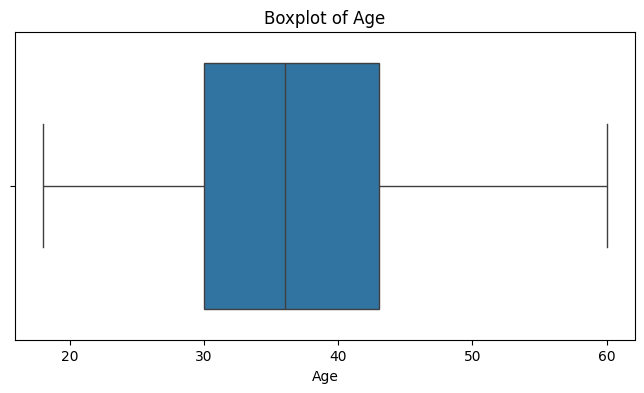

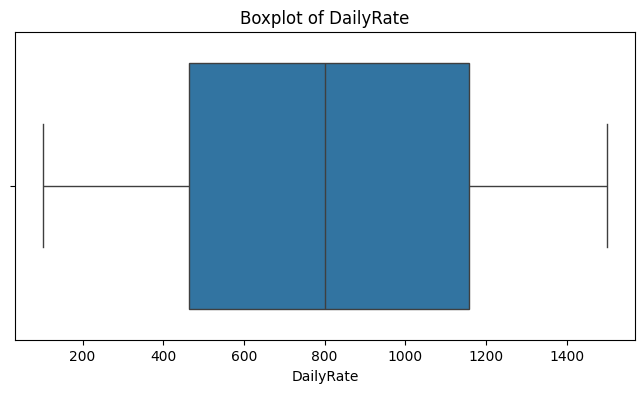

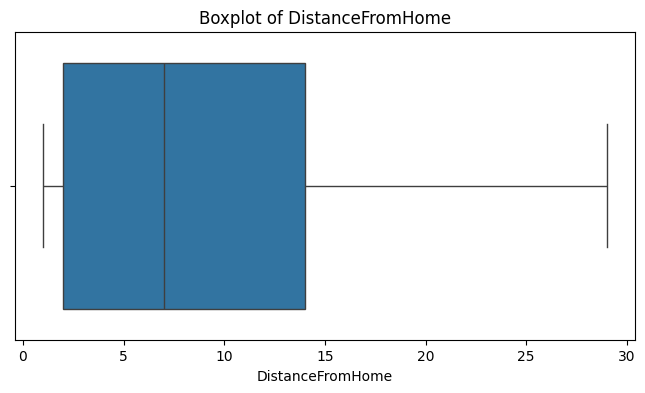

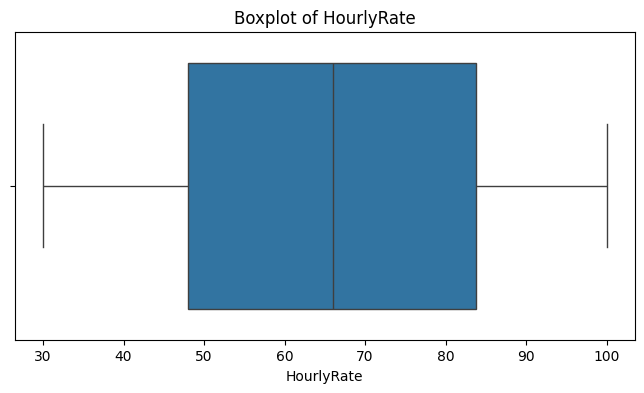

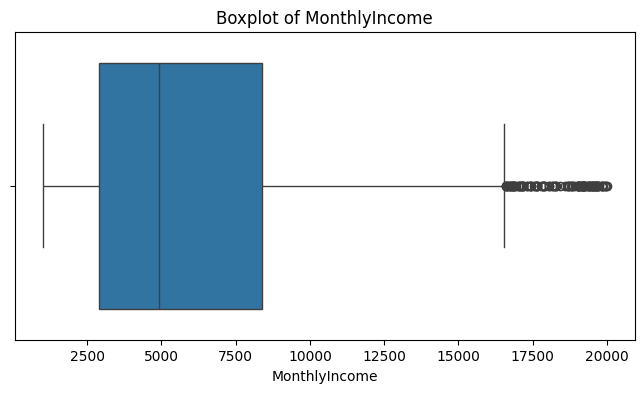

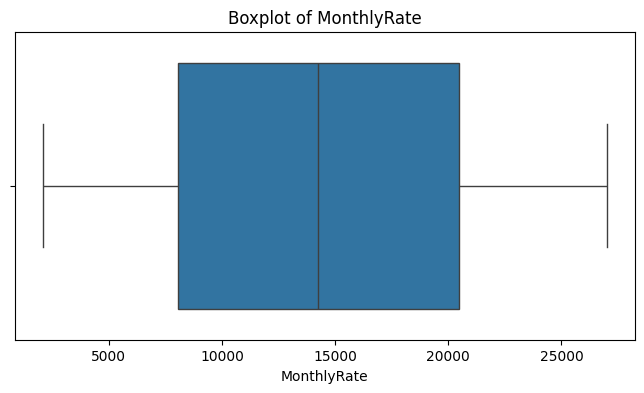

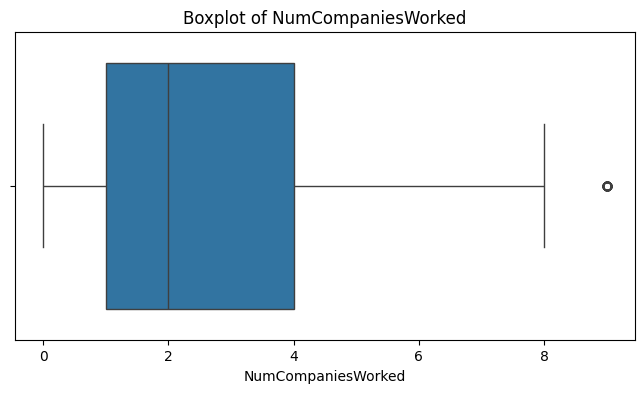

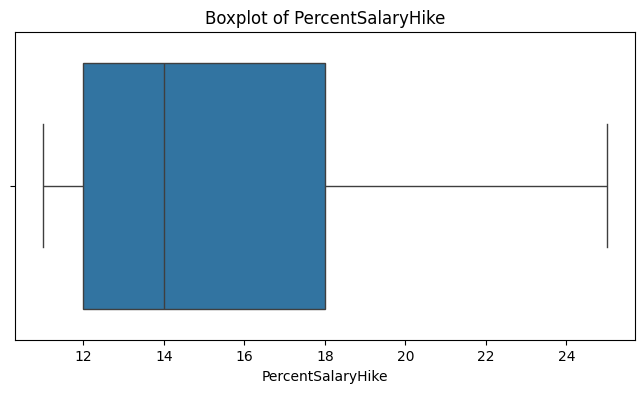

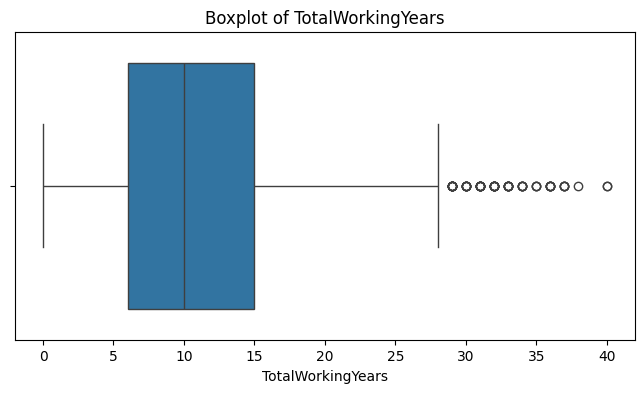

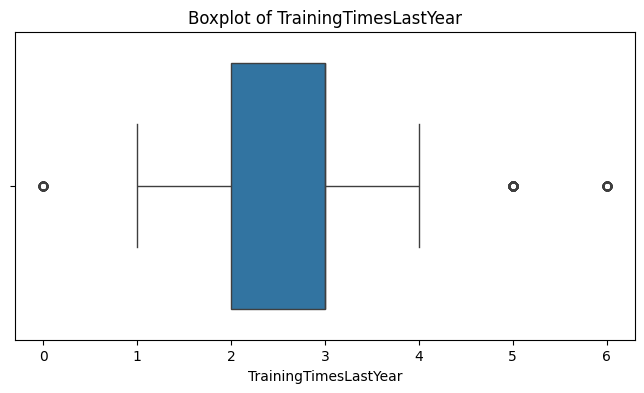

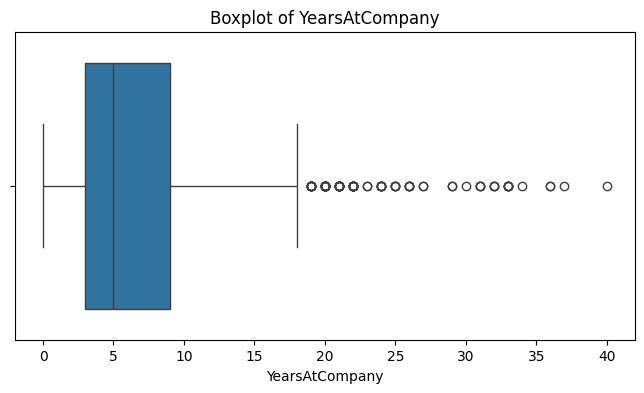

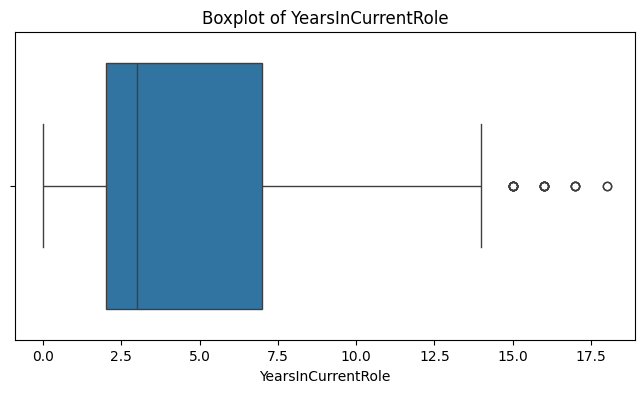

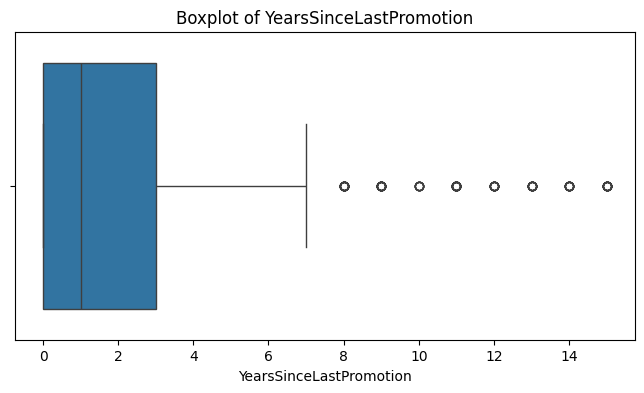

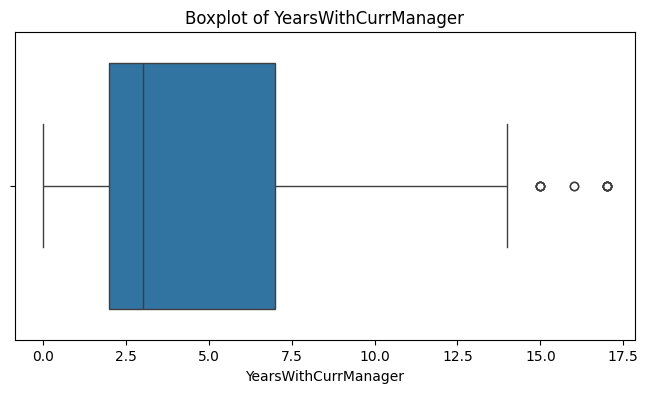

In [8]:
# Vẽ Boxplot từng biến số
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# Nhận xét: Nhìn sơ qua thì số liệu khá ổn định, không có dữ liệu bất thường nào.

In [9]:
# Bỏ để đỡ gây nhiễu:
df.drop(columns=['MonthlyRate'], inplace=True)


- Trong quá trình khám phá dữ liệu (EDA), chúng tôi nhận thấy biến MonthlyRate có phân bố giá trị rất rộng, dao động từ 2.094 đến 26.999 USD.
Tuy nhiên, khi so sánh với các biến kinh tế khác như MonthlyIncome – vốn trực tiếp thể hiện thu nhập thực tế của nhân viên, thì MonthlyRate không có mối quan hệ rõ ràng với việc nghỉ việc (Attrition).

In [10]:
# Chuẩn hóa datatype
for col in categorical_cols + [target_col]:
    df[col] = df[col].astype('category')

print("✅ Đã chuẩn hóa datatype cho các biến phân loại.")

✅ Đã chuẩn hóa datatype cho các biến phân loại.


In [11]:
#Phân nhóm
# Nhóm tuổi
df['AgeBand'] = pd.cut(
    df['Age'], 
    bins=[17, 25, 30, 35, 40, 60], 
    labels=['18-25', '26-30', '31-35', '36-40', '41+']
)

df['AgeBand'] = df['AgeBand'].astype('category')

print("✅ Đã sinh biến AgeBand.")

# Nhóm thâm niên làm việc
df['TenureBand'] = pd.cut(
    df['YearsAtCompany'],
    bins=[-1, 1, 3, 5, 10, 40],
    labels=['<1y', '1-3y', '3-5y', '5-10y', '>10y']
)

df['TenureBand'] = df['TenureBand'].astype('category')

print("✅ Đã sinh biến TenureBand.")


# Nhóm mức thu nhập
df['IncomeBand'] = pd.cut(
    df['MonthlyIncome'],
    bins=[0, 3000, 5000, 8000, 12000, 20000],
    labels=['Low', 'Lower-Mid', 'Mid', 'Upper-Mid', 'High']
)

df['IncomeBand'] = df['IncomeBand'].astype('category')

print("✅ Đã sinh biến IncomeBand.")



✅ Đã sinh biến AgeBand.
✅ Đã sinh biến TenureBand.
✅ Đã sinh biến IncomeBand.


# KPI 1: Tỷ lệ nghỉ việc (Attrition Rate) theo Phòng ban và Chức danh công việc (Department/JobRole)
- Sau khi nhận diện được tỷ lệ nghỉ việc chung toàn công ty, câu hỏi tiếp theo chúng tôi đặt ra là: "Vậy thì, nhân viên ở đâu đang nghỉ việc nhiều nhất?"

Không phải tất cả các phòng ban hay chức danh đều chịu ảnh hưởng như nhau. Một số bộ phận có thể đang ổn định, trong khi những bộ phận khác lại âm thầm mất đi một lượng lớn nhân viên.

Việc phân tích tỷ lệ nghỉ việc theo từng Department (phòng ban) và Job Role (chức danh công việc) cho phép chúng ta:

Khoanh vùng “ổ dịch” – những nơi có nguy cơ cao nhất.

Ưu tiên nguồn lực – tập trung hành động ở những nơi cần thiết nhất.

Hiểu sâu bản chất – xem liệu công việc, môi trường, hay yêu cầu công việc có đang ảnh hưởng đến quyết định rời đi của nhân viên hay không.

Vì vậy, trong phần tiếp theo, chúng tôi sẽ phân tích Attrition Rate theo từng Department và Job Role nhằm xác định những điểm nóng về nghỉ việc trong tổ chức.

#### 🔍Khám phá thông tin sơ bộ về phòng ban và role

In [12]:

# Tổng số nhân viên theo Department
dept_total = df['Department'].value_counts()

# Tổng số nhân viên theo JobRole
jobrole_total = df['JobRole'].value_counts()

# In ra kết quả
print("Tổng số nhân viên theo Department:")
print(dept_total)

print("\nTổng số nhân viên theo JobRole:")
print(jobrole_total)


Tổng số nhân viên theo Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Tổng số nhân viên theo JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


#### 🔍Phân tích Attrition dựa phòng ban và role

In [20]:
# 🔹 Tính attrition rate toàn công ty
attrition_total = (df['Attrition'] == 'Yes').mean() * 100
print(f"✅ Attrition Rate toàn công ty: {attrition_total:.2f}%\n")

# 🔹 Tạo bảng Department
dept_summary = pd.DataFrame({
    'Số nghỉ việc': df[df['Attrition'] == 'Yes']['Department'].value_counts(),
    'Tổng nhân viên': df['Department'].value_counts()
})
dept_summary['Attrition Rate (%)'] = (dept_summary['Số nghỉ việc'] / dept_summary['Tổng nhân viên']) * 100
dept_summary['Chênh lệch với trung bình (%)'] = dept_summary['Attrition Rate (%)'] - attrition_total
dept_summary = dept_summary.sort_values(by='Attrition Rate (%)', ascending=False)

print("📊 Thống kê nghỉ việc theo Department:")
print(dept_summary)

# 🔹 Tạo bảng JobRole
jobrole_summary = pd.DataFrame({
    'Số nghỉ việc': df[df['Attrition'] == 'Yes']['JobRole'].value_counts(),
    'Tổng nhân viên': df['JobRole'].value_counts()
})
jobrole_summary['Attrition Rate (%)'] = (jobrole_summary['Số nghỉ việc'] / jobrole_summary['Tổng nhân viên']) * 100
jobrole_summary['Chênh lệch với trung bình (%)'] = jobrole_summary['Attrition Rate (%)'] - attrition_total
jobrole_summary = jobrole_summary.sort_values(by='Attrition Rate (%)', ascending=False)

print("\n📊 Thống kê nghỉ việc theo JobRole:")
print(jobrole_summary)


✅ Attrition Rate toàn công ty: 16.12%

📊 Thống kê nghỉ việc theo Department:
                        Số nghỉ việc  Tổng nhân viên  Attrition Rate (%)  \
Department                                                                 
Sales                             92             446           20.627803   
Human Resources                   12              63           19.047619   
Research & Development           133             961           13.839750   

                        Chênh lệch với trung bình (%)  
Department                                             
Sales                                        4.505354  
Human Resources                              2.925170  
Research & Development                      -2.282699  

📊 Thống kê nghỉ việc theo JobRole:
                           Số nghỉ việc  Tổng nhân viên  Attrition Rate (%)  \
JobRole                                                                       
Sales Representative                 33              83           39

C:\Users\PC\AppData\Local\Temp\ipykernel_3724\3308545605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


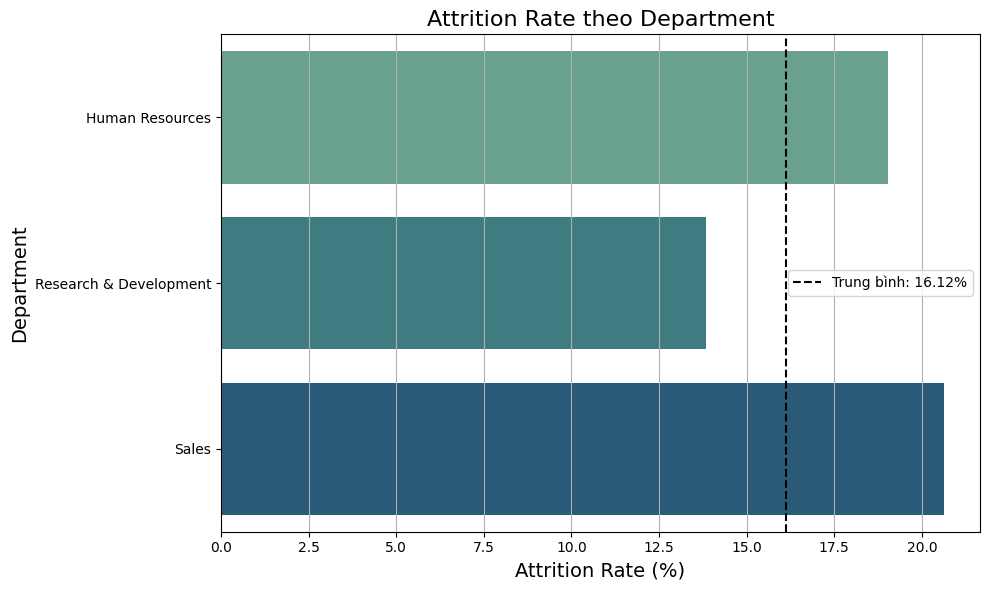

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Attrition Rate (%)',
    y=dept_summary.index,
    data=dept_summary,
    palette='crest'
)
plt.axvline(attrition_total, color='black', linestyle='--', label=f'Trung bình: {attrition_total:.2f}%')
plt.title('Attrition Rate theo Department', fontsize=16)
plt.xlabel('Attrition Rate (%)', fontsize=14)
plt.ylabel('Department', fontsize=14)
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_3724\538222816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


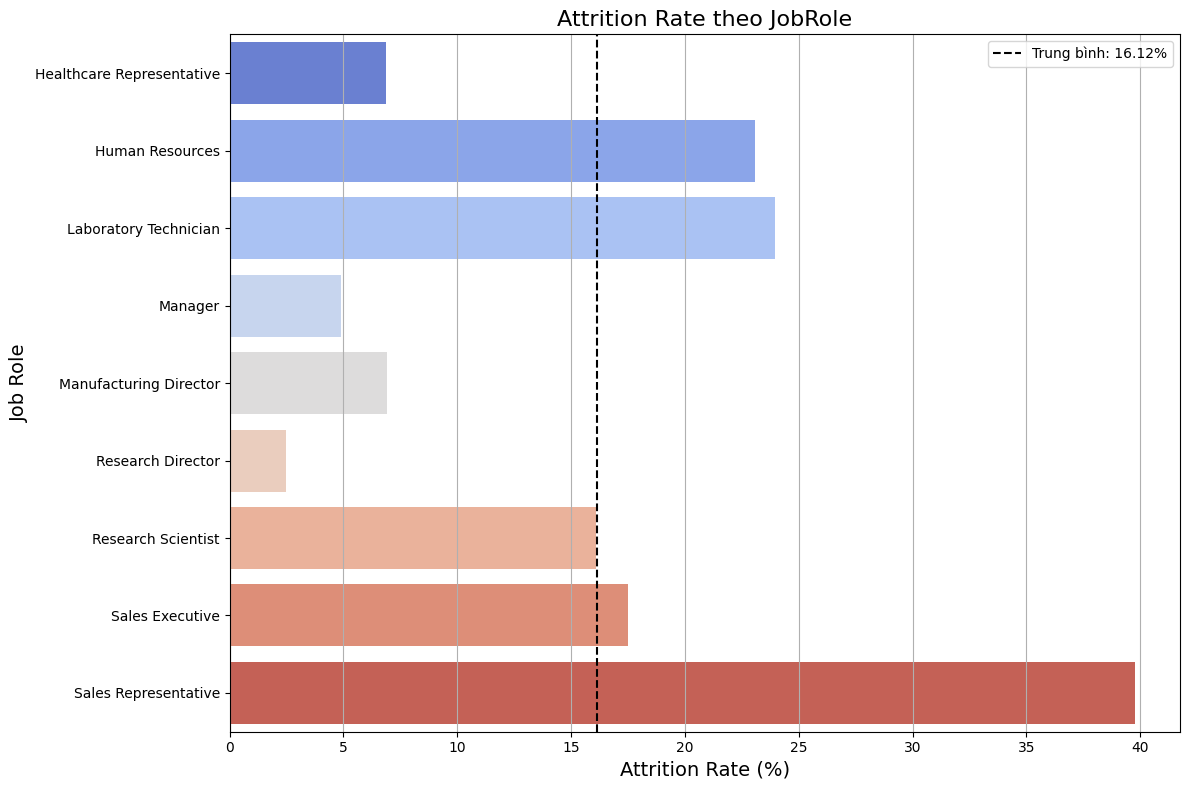

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Attrition Rate (%)',
    y=jobrole_summary.index,
    data=jobrole_summary,
    palette='coolwarm'
)
plt.axvline(attrition_total, color='black', linestyle='--', label=f'Trung bình: {attrition_total:.2f}%')
plt.title('Attrition Rate theo JobRole', fontsize=16)
plt.xlabel('Attrition Rate (%)', fontsize=14)
plt.ylabel('Job Role', fontsize=14)
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


### 🎯 KPI: Attrition Rate theo Department và Job Role



#### ✅ Bức tranh toàn cảnh: Tỷ lệ nghỉ việc toàn công ty

> Tỷ lệ nghỉ việc trung bình của toàn công ty hiện tại là **16.12%**.  
> Ở mức này, có vẻ như mọi thứ vẫn nằm trong ngưỡng chấp nhận được.

🟢 *Tâm lý ban đầu của người đọc: "Ổn mà, không đến mức phải lo."*



#### 🚨 Những tín hiệu vượt chuẩn bắt đầu xuất hiện…

📊 **Attrition Rate theo Department**:

| Department            | Số nghỉ việc | Tổng nhân viên | Attrition Rate (%) | So với trung bình |
|----------------------|--------------|----------------|---------------------|--------------------|
| Sales                | 92           | 446            | **20.63%**          | **+4.51%**         |
| Human Resources      | 12           | 63             | 19.05%              | +2.93%             |
| Research & Development | 133        | 961            | 13.84%              | –2.28%             |

> Bộ phận **Sales** – động cơ chính của doanh thu – đang có tỷ lệ nghỉ việc cao hơn trung bình đến **4.5%**, tương đương mức tăng **28% so với chuẩn**.

🟡 *Khán giả bắt đầu cảm nhận có điều gì đó không ổn đang âm thầm xảy ra.*



#### 🔥 Cao trào: Khoanh vùng “ổ dịch” bên trong bộ phận Sales

📊 **Attrition Rate theo Job Role**:

| Job Role              | Số nghỉ việc | Tổng nhân viên | Attrition Rate (%) | So với trung bình |
|-----------------------|--------------|----------------|---------------------|--------------------|
| Sales Representative  | 33           | 83             | **39.76%**          | **+23.64%**        |
| Laboratory Technician | 62           | 259            | 23.94%              | +7.82%             |
| Sales Executive       | 57           | 326            | 17.48%              | +1.36%             |

> **Gần 40%** nhân viên **Sales Representative** rời bỏ công ty.  
> Điều này nghĩa là **cứ 5 người được tuyển thì 2 người sẽ rời đi** trong thời gian ngắn.

> Đây không còn là một con số “báo động” – nó là một **ổ dịch nhân sự thực sự**.

🔴 *Người đọc bị kéo vào vùng nguy hiểm. Đây là điểm cao trào của câu chuyện.*



#### 💸 Tác động thực tế: “Con số nhỏ, thiệt hại lớn”

> Với chi phí tuyển dụng – đào tạo trung bình ước tính **10.000 USD/người**,  
> Công ty đang thiệt hại tới **330.000 USD/năm** chỉ riêng ở nhóm Sales Representative.

💥 *Cảm xúc chuyển sang tài chính – đau ví tiền – thôi thúc hành động ngay.*



#### 🧠 Kết luận & Dẫn dắt

> 👉 **Sales Representative là "ổ dịch trọng tâm" cần ưu tiên phân tích nguyên nhân.**  
> 👉 Các yếu tố cần làm rõ tiếp theo: **OverTime**, **Job Satisfaction**, **Thu nhập**.

🧭 *Câu chuyện đã đi đến cao trào và mở ra chương mới – tìm nguyên nhân và giải pháp.*


